In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/brainsmulti.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
# !rm -rf /content/trainingdatas

In [3]:
import numpy as np
import random
import cv2
import os
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

import random


In [4]:
import random
x = random.sample(range(1,20000), 5000)


In [ ]:
# paths='/content/datasetlung/Bengin cases'


# jj=0
# kk=1000;
# for i in os.listdir(paths):
#   jj=jj+1
#   kk=kk+1
#   reading=cv2.imread(paths+'/'+i)
#   leftr= cv2.flip(reading, 1)

#   rots=cv2.rotate(reading, cv2.ROTATE_180)

#   cv2.imwrite(paths+'/'+str(jj)+'.jpg',leftr)
#   cv2.imwrite(paths+'/'+str(kk)+'.jpg',rots)

In [5]:
def load(paths, verbose=-1):
    '''expects images for each class in seperate dir,
    e.g all digits in 0 class in the directory named 0 '''
    data = list()
    labels = list()
    # loop over the input images
    for (i, imgpath) in enumerate(paths):
        print(imgpath)
        # load the image and extract the class labels
        # im_gray = cv2.imread(imgpath , cv2.IMREAD_GRAYSCALE)
        im_gray= cv2.imread(imgpath)
        im_gray = cv2.resize( im_gray, (128,128))
        image = im_gray # cv2.imread(imgpath)
        # print(image.shape)
        label = imgpath.split(os.path.sep)[-2]

        print(label)

        if label=='glioma':
            label=[1,0,0,0]
        elif label=='meningioma':
           label=[0,1,0,0]
        elif label=='notumor':
           label=[0,0,1,0]
        else:
           label=[0,0,0,1]



        # scale the image to [0, 1] and add to list
        data.append(image/255)
        labels.append(label)
        # show an update every `verbose` images
        if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
            print("[INFO] processed {}/{}".format(i + 1, len(paths)))
    # return a tuple of the data and labels

    return data, labels

In [6]:
#declear path to your mnist data folder
img_path = '/content/Training' #'../input/cifar10-pngs-in-folders/cifar10/test'  # <-- test dataset #'../input/mnistasjpg/trainingSample/trainingSample' # <-- smaller dataset

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(image_list,
                                                    label_list,
                                                    test_size=0.25,
                                                    random_state=42)

Streaming output truncated to the last 5000 lines.
/content/Training/notumor/Tr-no_0724.jpg
notumor
/content/Training/notumor/Tr-no_1198.jpg
notumor
/content/Training/notumor/Tr-no_1124.jpg
notumor
/content/Training/notumor/Tr-no_0278.jpg
notumor
/content/Training/notumor/Tr-no_1338.jpg
notumor
/content/Training/notumor/Tr-no_0052.jpg
notumor
/content/Training/notumor/Tr-no_0048.jpg
notumor
/content/Training/notumor/Tr-no_1430.jpg
notumor
/content/Training/notumor/Tr-no_0818.jpg
notumor
/content/Training/notumor/Tr-no_1137.jpg
notumor
/content/Training/notumor/Tr-no_0439.jpg
notumor
/content/Training/notumor/Tr-no_1245.jpg
notumor
/content/Training/notumor/Tr-no_1593.jpg
notumor
/content/Training/notumor/Tr-no_0838.jpg
notumor
/content/Training/notumor/Tr-no_0461.jpg
notumor
/content/Training/notumor/Tr-no_0074.jpg
notumor
/content/Training/notumor/Tr-noTr_0006.jpg
notumor
/content/Training/notumor/Tr-no_1482.jpg
notumor
/content/Training/notumor/Tr-no_0467.jpg
notumor
/content/Trainin

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
y_train.shape

(4284, 4)

Text(0.5, 1.0, 'sample image training')

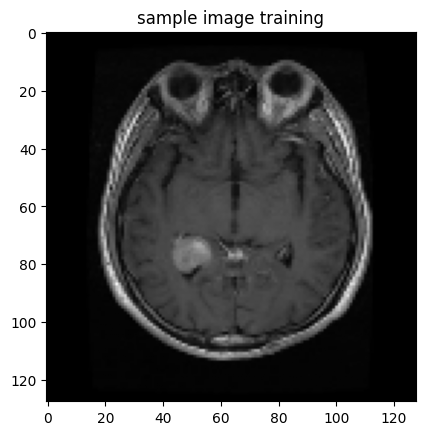

In [7]:
#@title Default title text
import matplotlib.pyplot as plt
rr=(X_test[2])

rr1=rr.reshape(128,128,3)

plt.imshow(rr1,cmap='gray')
plt.title('sample image training')


In [8]:
def create_clients(image_list, label_list, num_clients=2, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as
                data shards - tuple of images and label lists.
        args:
            image_list: a list of numpy arrays of training images
            label_list:a list of binarized labels for each image
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1

    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    data = list(zip(image_list, label_list))

    random.shuffle(data)

    #shard data and place at each client
    size = (len(data)//num_clients)+5

    print('size',size)

    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))}

In [12]:
#create clients
num_clients=4
clients = create_clients(X_train, y_train, num_clients, initial='client')

size 1076


In [13]:
import numpy
# x is your dataset
x = numpy.random.rand(1, 20)
indices = numpy.random.permutation(x.shape[0])
training_idx, test_idx = indices[:80], indices[80:]
training, test = x[training_idx,:], x[test_idx,:]

print(indices )

[0]


In [14]:
def batch_data(data_shard, bs=12):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

3

In [15]:
#process and batch the training data for each client
clients_batched = dict()
# distri2=[100,80,70,120,130,60,40,160,100,115,60]

jj=0
for (client_name, data) in clients.items():
    jj=jj+1
    data=data
    print(np.array(data).shape)
    print(client_name)
    clients_batched[client_name] = batch_data(data)
    print(len(clients_batched[client_name] ))

#process and batch the test set
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

<ipython-input-15-10fcd39108cb>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(data).shape)


(1076, 2)
client_1
90
(1076, 2)
client_2
90
(1076, 2)
client_3
90
(1056, 2)
client_4
88


In [17]:
zzz=clients_batched[client_name]

In [18]:

class SimpleMLP:
    @staticmethod
    def build(classes):
        pretrained_model_three = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False ,input_shape=[128,128, 3])
        pretrained_model_three.trainable = False
        model_mt = tf.keras.Sequential([pretrained_model_three,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4, activation='softmax')])




        return model_mt

In [ ]:
# model_mt = tf.keras.Sequential([pretrained_model_three,
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

In [19]:
lr = 0.01
from tensorflow import keras
from keras import optimizers
comms_round = 2
loss='categorical_crossentropy'
metrics = ['accuracy']


optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

In [20]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    print(global_count)
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    print(local_count)
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



In [21]:
#title Default title text

def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    # print(logits)
   # print(logits)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [22]:

IMAGE_SIZE = (48,48)
IMAGE_SHAPE = IMAGE_SIZE + (3,)

BS = 64
EPOCHS = 125
ADAM_LEARNING_RATE = 0.0001
PATIENCE =10

In [23]:
# Compile model

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      f1_score,
]

adam = tf.keras.optimizers.legacy.Adam(learning_rate=ADAM_LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

# model.compile(optimizer=adam, loss='categorical_crossentropy',metrics=METRICS)

In [24]:
zzz=test_batched

In [25]:
lr = 0.01
from tensorflow import keras
from keras import optimizers
comms_round = 3
loss='categorical_crossentropy'
metrics = ['accuracy']


optimizer=tf.keras.optimizers.legacy.Adam(lr=0.001)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
#title Training and testing
#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build(4)

#commence global training loop
for comm_round in range(comms_round):

    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    print( client_names)
    # random.shuffle(client_names)

    #loop through each client and create new local model
    jj=0

    allloss1=[]

    allacc1=[]

    allprec1=[]

    allflsc1=[]

    allflau1=[]



    for client in client_names:

        print(client)
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(4)
        local_model.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=METRICS)

        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)


        #fit local model with client's data
        history1=local_model.fit(clients_batched[client],validation_data=test_batched,epochs=20, verbose=1)

        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)

        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)


        scaled_local_weight_list.append(scaled_weights)

        allacc=local_model.history.history['val_accuracy']

        allacc1.append(allacc)

        allloss=local_model.history.history['val_loss']

        allloss1.append(allloss)

        allprec=local_model.history.history['val_precision']

        allprec1.append(allprec)

        allflsc=local_model.history.history['val_f1_score']

        allflsc1.append(allflsc)

        allflau=local_model.history.history['auc']

        allflau1.append(allflau)


        # hs=history1.history

        # acc = hs['accuracy']
        # val_acc = hs['val_accuracy']
        # loss =  hs['loss']
        # val_loss = hs['val_loss']
        # auc =  hs['auc']
        # val_auc = hs['val_auc']
        # precision =hs['precision']
        # val_precision =hs['val_precision']
        # f1 = hs['f1_score']
        # val_f1 = hs['val_f1_score']


        #clear session to free memory after each communication round
        # K.clear_session()

    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)

    #update global model
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)

29084464/29084464 [==============================] - 0s 0us/step
['client_1', 'client_2', 'client_3', 'client_4']
client_1
Epoch 1/20
90/90 [==============================] - 69s 534ms/step - loss: 1.4634 - accuracy: 0.8711 - precision: 0.7446 - recall: 0.7370 - auc: 0.8950 - f1_score: 0.7408 - val_loss: 0.9502 - val_accuracy: 0.9074 - val_precision: 0.8177 - val_recall: 0.8102 - val_auc: 0.9364 - val_f1_score: 0.8139
Epoch 2/20
90/90 [==============================] - 4s 46ms/step - loss: 0.5497 - accuracy: 0.9396 - precision: 0.8806 - recall: 0.8773 - auc: 0.9689 - f1_score: 0.8784 - val_loss: 0.8762 - val_accuracy: 0.9228 - val_precision: 0.8488 - val_recall: 0.8410 - val_auc: 0.9465 - val_f1_score: 0.8449
Epoch 3/20
90/90 [==============================] - 4s 44ms/step - loss: 0.2799 - accuracy: 0.9691 - precision: 0.9386 - recall: 0.9377 - auc: 0.9862 - f1_score: 0.9370 - val_loss: 0.8501 - val_accuracy: 0.9147 - val_precision: 0.8306 - val_recall: 0.8277 - val_auc: 0.9435 - val_f

In [27]:
for(X1_test, Y1_test) in test_batched:
        global_acc, global_loss = test_model(X1_test, Y1_test, global_model, comm_round)

45/45 [==============================] - 1s 31ms/step
comm_round: 2 | global_acc: 93.277% | global_loss: 0.809977650642395


45/45 [==============================] - 1s 30ms/step
comm_round: 2 | global_acc: 93.277% | global_loss: 0.809977650642395


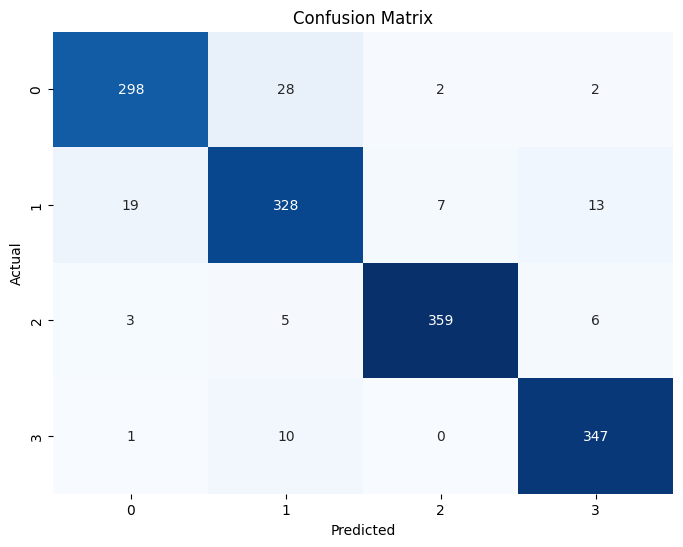

In [28]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define your test_model function
def test_model(X_test, Y_test, model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    predicted_labels = tf.argmax(logits, axis=1)
    true_labels = tf.argmax(Y_test, axis=1)
    acc = accuracy_score(predicted_labels, true_labels)
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))

    return predicted_labels, true_labels, acc, loss

# Initialize empty lists to accumulate predictions and true labels
all_predicted_labels = []
all_true_labels = []

# Loop through test batches and call the test_model function
for X1_test, Y1_test in test_batched:
    global_preds, Y1_test, global_acc, global_loss = test_model(X1_test, Y1_test, global_model, comm_round)

    # Append the current batch's predictions and true labels to the accumulators
    all_predicted_labels.extend(global_preds)
    all_true_labels.extend(Y1_test)

# Calculate the overall confusion matrix
confusion_matrix_result = confusion_matrix(all_true_labels, all_predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [29]:
hs=history1.history

acc = hs['accuracy']
val_acc = hs['val_accuracy']
loss =  hs['loss']
val_loss = hs['val_loss']
auc =  hs['auc']
val_auc = hs['val_auc']
precision =hs['precision']
val_precision =hs['val_precision']
f1 = hs['f1_score']
val_f1 = hs['val_f1_score']


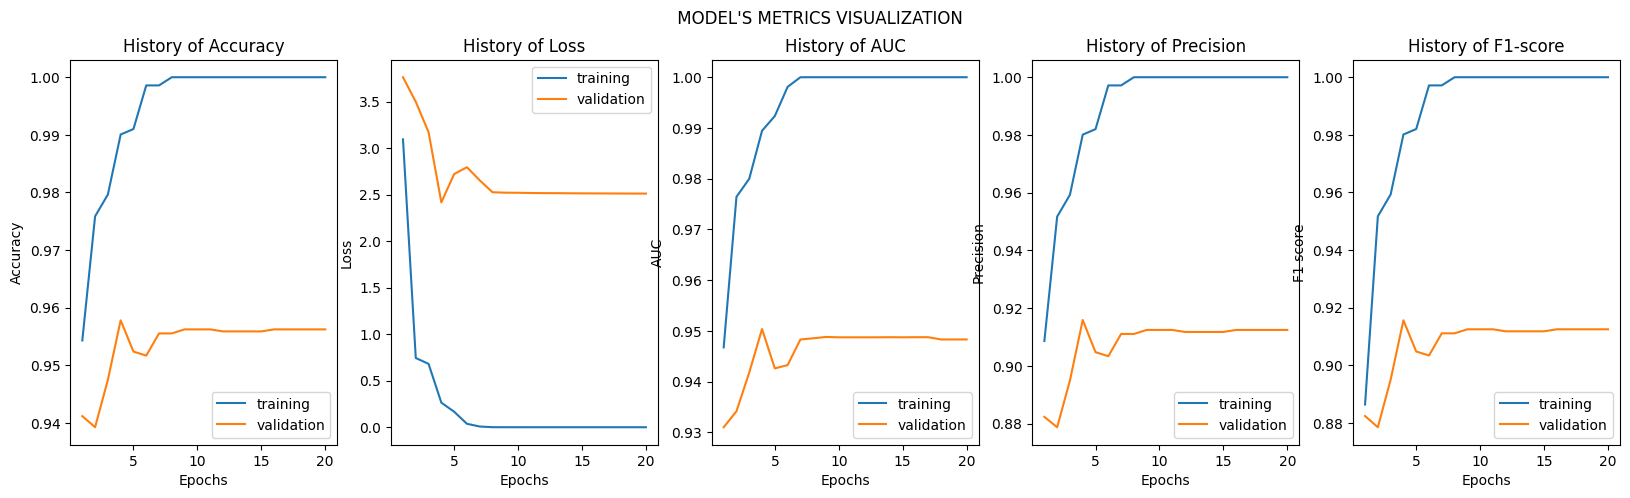

In [30]:

fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

ax1.plot(range(1, len(acc) + 1), acc)
ax1.plot(range(1, len(val_acc) + 1), val_acc)
ax1.set_title('History of Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(['training', 'validation'])


ax2.plot(range(1, len(loss) + 1), loss)
ax2.plot(range(1, len(val_loss) + 1), val_loss)
ax2.set_title('History of Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(['training', 'validation'])

ax3.plot(range(1, len(auc) + 1), auc)
ax3.plot(range(1, len(val_auc) + 1), val_auc)
ax3.set_title('History of AUC')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('AUC')
ax3.legend(['training', 'validation'])

ax4.plot(range(1, len(precision) + 1), precision)
ax4.plot(range(1, len(val_precision) + 1), val_precision)
ax4.set_title('History of Precision')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Precision')
ax4.legend(['training', 'validation'])

ax5.plot(range(1, len(f1) + 1), f1)
ax5.plot(range(1, len(val_f1) + 1), val_f1)
ax5.set_title('History of F1-score')
ax5.set_xlabel('Epochs')
ax5.set_ylabel('F1 score')
ax5.legend(['training', 'validation'])

[]

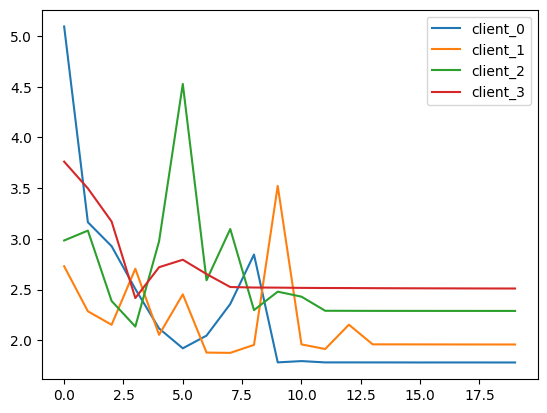

In [31]:

import matplotlib.pyplot as plt

aaa1=[]
for zz in range(0,num_clients):
  zzz1='client_'+str(zz)
  plt.figure(1)
  plt.plot(allloss1[zz])
  aaa1.append(zzz1)

plt.legend(aaa1, loc='upper right')


# plt.xlabel('Epoch')
# # naming the y axis
# plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

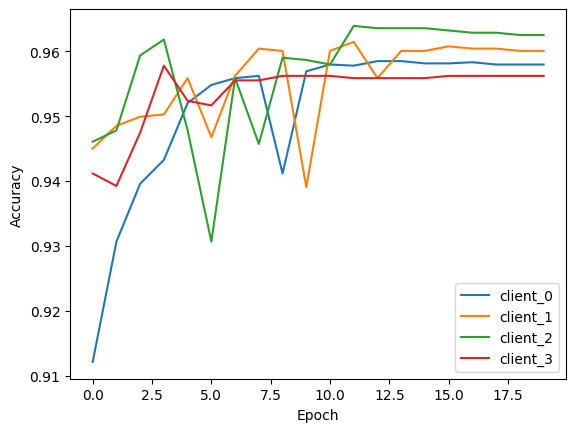

In [32]:

import matplotlib.pyplot as plt

aaa1=[]
for zz in range(0,num_clients):
  zzz1='client_'+str(zz)
  plt.figure(1)
  plt.plot(allacc1[zz])
  aaa1.append(zzz1)

plt.legend(aaa1, loc='lower right')


plt.xlabel('Epoch')
# # naming the y axis
plt.ylabel('Accuracy')

Text(0, 0.5, 'Precison')

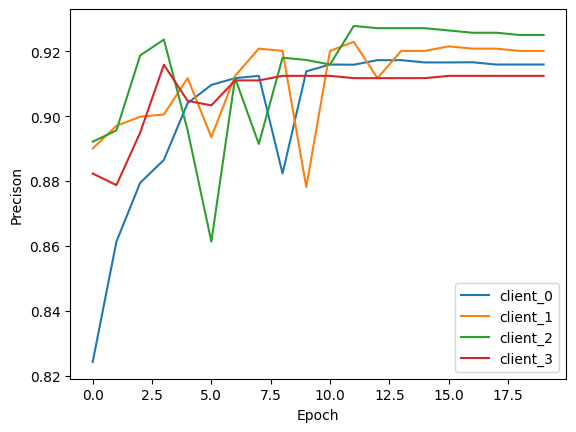

In [33]:

import matplotlib.pyplot as plt

aaa1=[]
for zz in range(0,num_clients):
  zzz1='client_'+str(zz)
  plt.figure(1)
  plt.plot(allprec1[zz])
  aaa1.append(zzz1)

plt.legend(['c_!','c2'], loc='lower right')

plt.legend(aaa1, loc='lower right')


plt.xlabel('Epoch')
# # naming the y axis
plt.ylabel('Precison')

Text(0, 0.5, 'F1-Score')

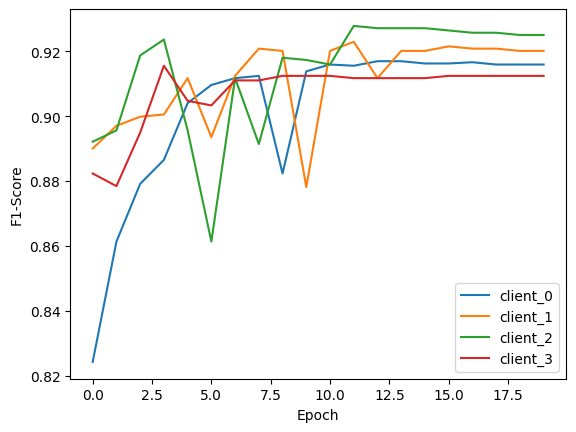

In [34]:
    # allflsc1=[]

    # allflau1=[]

import matplotlib.pyplot as plt

aaa1=[]
for zz in range(0,num_clients):
  zzz1='client_'+str(zz)
  plt.figure(1)
  plt.plot(allflsc1[zz])
  aaa1.append(zzz1)

plt.legend(aaa1, loc='lower right')


plt.xlabel('Epoch')
# # naming the y axis
plt.ylabel('F1-Score')

Text(0, 0.5, 'AUC')

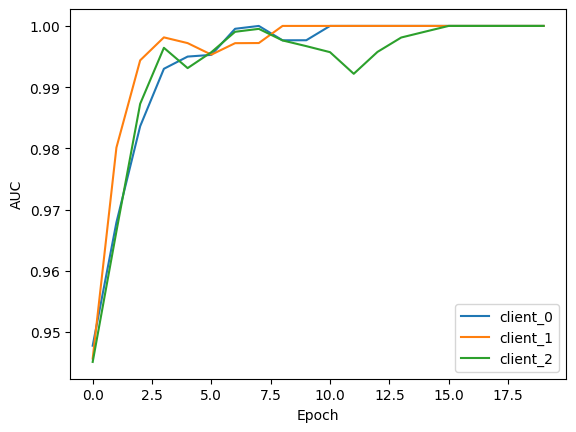

In [ ]:
import matplotlib.pyplot as plt

aaa1=[]
for zz in range(0,num_clients):
  zzz1='client_'+str(zz)
  plt.figure(1)
  plt.plot(allflau1[zz])
  aaa1.append(zzz1)

plt.legend(aaa1, loc='lower right')


plt.xlabel('Epoch')
# # naming the y axis
plt.ylabel('AUC')

1/1 [==============================] - 0s 238ms/step


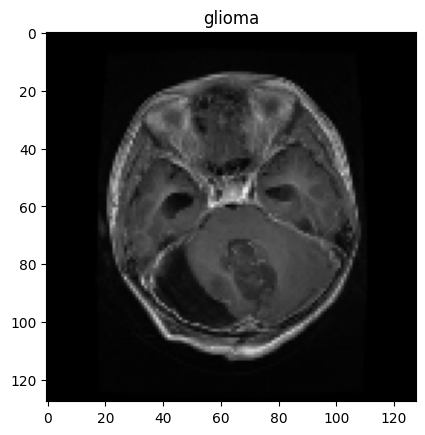

In [ ]:


inp=cv2.imread('/content/Testing/glioma/Te-glTr_0000.jpg')

im_g = cv2.resize( inp, (128,128))
imm=im_g
im_g=im_g/255
img_g=np.expand_dims(im_g, axis=0)

logits = global_model.predict([img_g])
logs=[logits[0][0],logits[0][1],logits[0][2]]
    # print(logs)
out=logs.index(max(logs))
    # print(out)
    # print('/content/'+str(jj)+'.png')
if out==0:
  plt.figure(str(jj))
  plt.imshow(imm)
  plt.title('glioma')
elif out==1:
  plt.figure(str(jj))
  plt.imshow(imm)
  plt.title('meningioma')
elif out==2:
  plt.figure(str(jj))
  plt.imshow(imm)
  plt.title('notumor')
elif out==3:
  plt.figure(str(jj))
  plt.imshow(imm)
  plt.title('pitruity')



